# Wet gas

In [1]:
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import Reader

## Read log files

In [2]:
files = { "ref":"/Users/phansson/work/climeon/data/M6/MainLog/Datalog_2018_05_16_14_14_53.csv",
        "killer":"/Users/phansson/work/climeon/data/M6/MainLog/Datalog_2018_05_17_01_00_02-mod.csv"}
logs = {}
for name, path in files.items():
    logs[name] = Reader.LogFileType1(path)


Process headers
got 103 headers
Process data
got data with shape (41109, 103)
Process date and time.
got 41109 date/times 
Create data frame
Process headers
got 103 headers
Process data
got data with shape (11584, 103)
Process date and time.
got 11584 date/times 
Create data frame


Show overall power and turbine rpm for whole log file

Select data period where things were running "stable"

In [3]:
def plot_simple_two_scale_series(y1, y2, l1, l2):
    fig, ax1 = plt.subplots(figsize=(12,7))
    y1.plot(ax=ax1, color='b', label=l1)
    ax1.set_ylabel(l1, color='b')
    ax1.tick_params('y', colors='b')
    ax2 = ax1.twinx()
    ax2.set_ylabel(l2, color='g')
    ax2.tick_params('y', colors='g')
    y2.plot(ax=ax2, label=l2, color='g')
    return fig, (ax1, ax2)

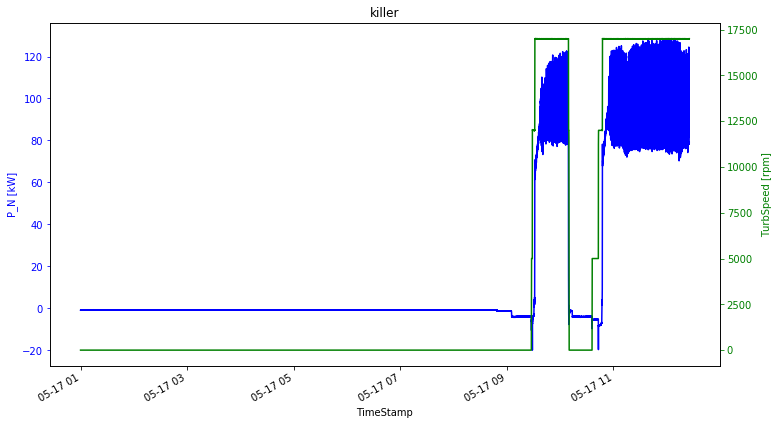

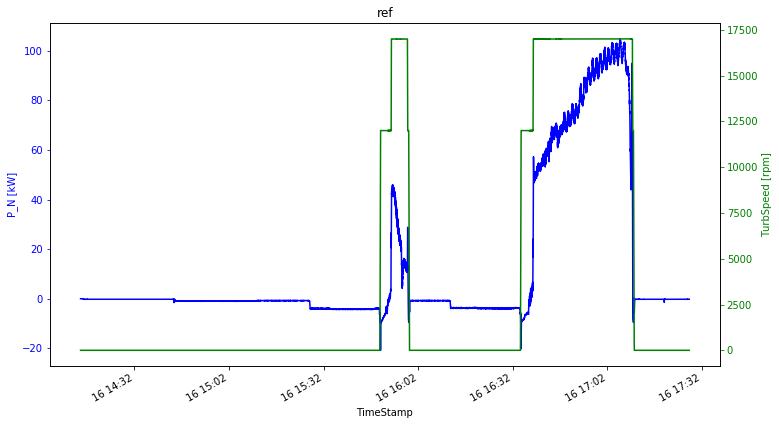

In [4]:
for name, f in logs.items():
    fig, (ax, ax2) = plot_simple_two_scale_series(f.df['P_N [kW]'], f.df['TurbSpeed [rpm]'],'P_N [kW]', 'TurbSpeed [rpm]')
    ax.set_title(name)

## Select runs with start and stable running

In [5]:
df_seltime = {"killer_1": logs["killer"].df.between_time("09:00", "10:30"),
              "killer_2": logs["killer"].df.between_time("10:45", "23:59"),
              #"ref_1st":  logs["ref"].df.between_time("15:45", "16:15"),
              "ref_2nd":  logs["ref"].df.between_time("16:30", "17:15")
             }

## Select runs based on other variables

In [6]:
stable_power = {}
#wg_events = {}
for name, df in df_seltime.items():
    stable_power[name] = df['P_N [kW]'] > 0.0
    #power = df['P_N [kW]'] > 20.0
    #rpm = df['TurbSpeed [rpm]'] > 16900.0
    #dT = (df['T54 [deg C]'] - df['T33 [deg C]']) > 2.0
    #wg_events[name] = dT & power & rpm
    #print(df[dT & power])

In [7]:
#df_events['killer_2']

Plot selected periods on power and rpms

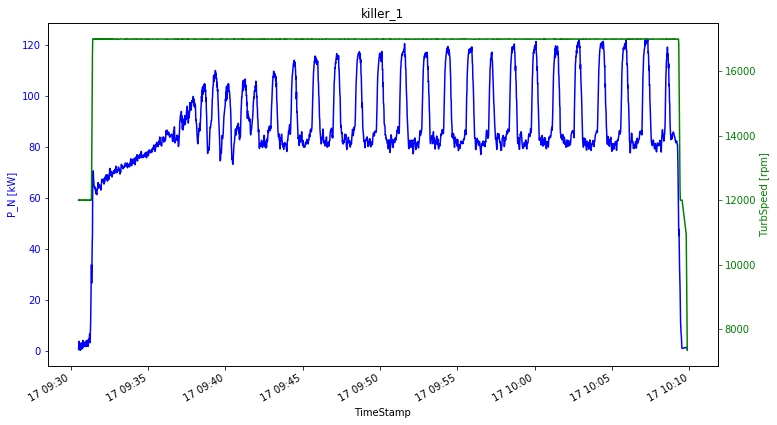

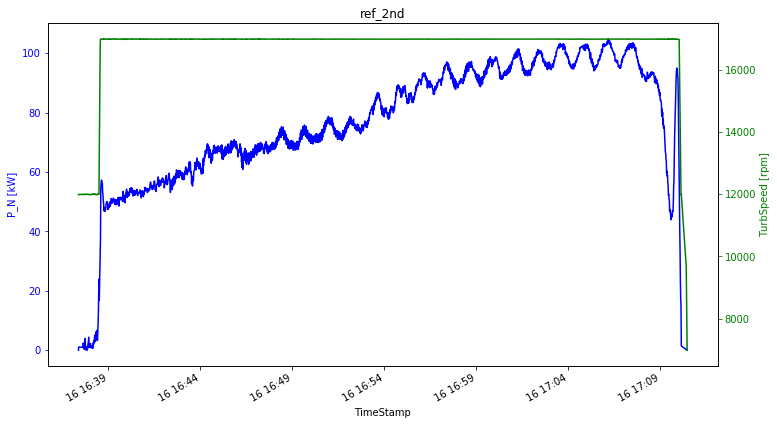

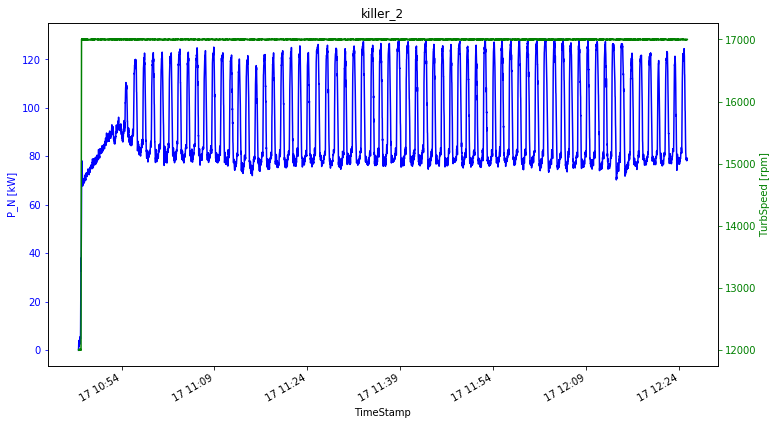

In [8]:
for name, df in df_seltime.items():
    fig, (ax, ax2) = plot_simple_two_scale_series(df[stable_power[name]]['P_N [kW]'], df[stable_power[name]]['TurbSpeed [rpm]'],'P_N [kW]', 'TurbSpeed [rpm]')
    ax2.set_title(name)

## Define wet gas indicator

In [9]:
wetgas_dT = {}
for name, df in df_seltime.items():
    wetgas_dT[name] = df[stable_power[name]]['T54 [deg C]'].sub(df[stable_power[name]]['T33 [deg C]'])

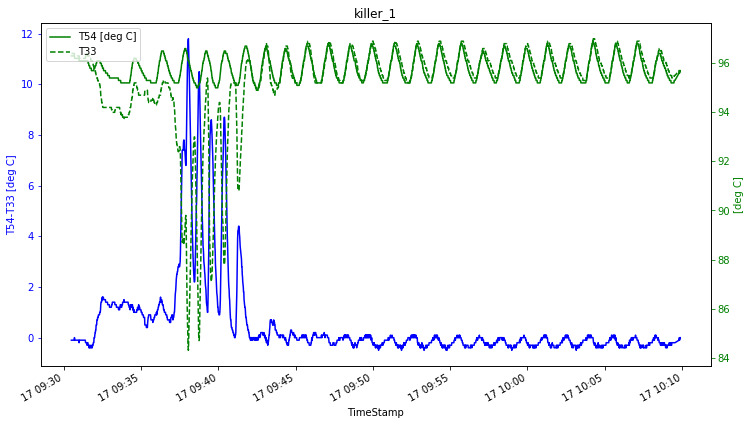

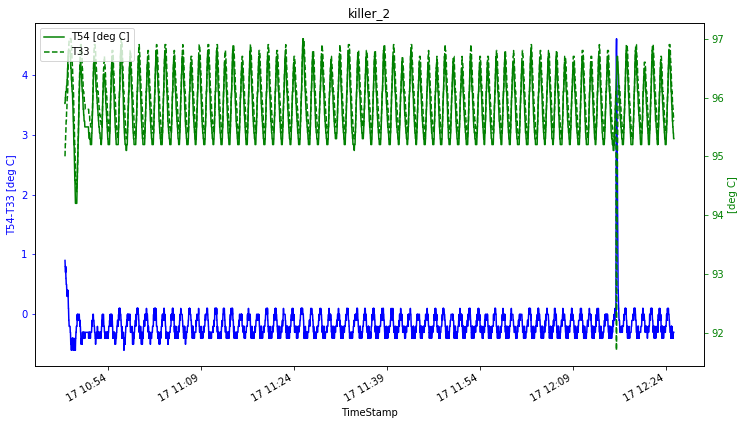

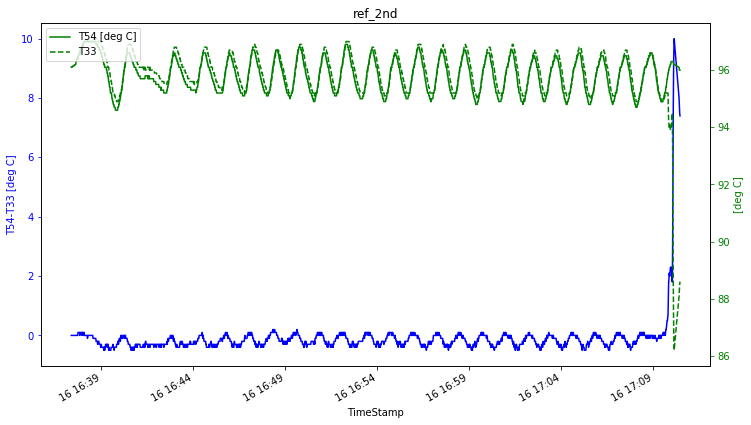

In [10]:
for name, s in wetgas_dT.items():
    fig, (ax, ax2) = plot_simple_two_scale_series(s, 
                                                  df_seltime[name][stable_power[name]]['T54 [deg C]'], 
                                                  'T54-T33 [deg C]', 'T54 [deg C]')
    ax2.set_title(name)
    df_seltime[name][stable_power[name]]['T33 [deg C]'].plot(ax=ax2, color='g', style='--', label='T33')
    ax2.set_ylabel('[deg C]', color='g')
    ax2.legend(loc=2)
    

## Plot hot and cold water

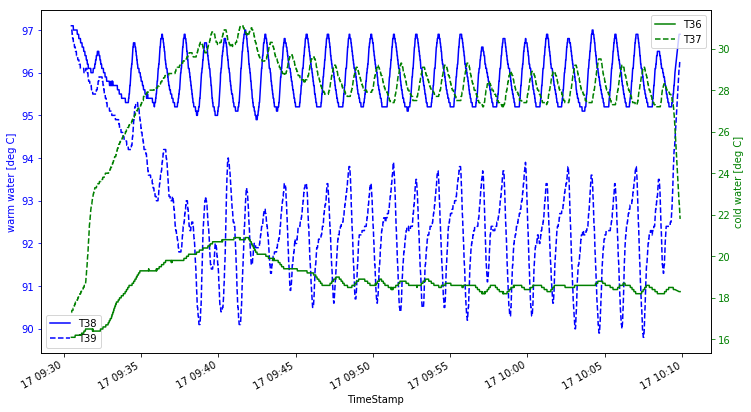

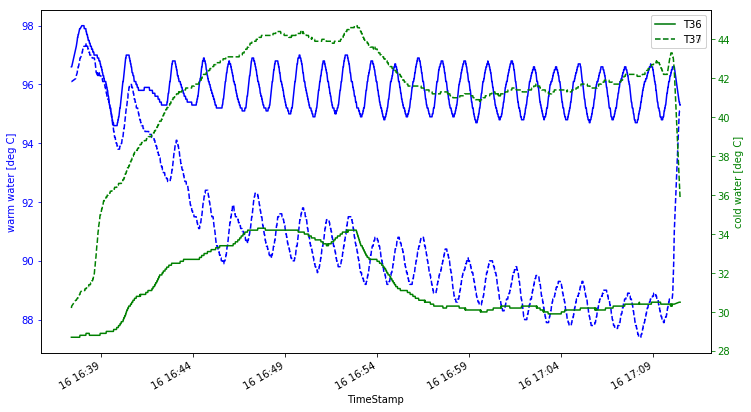

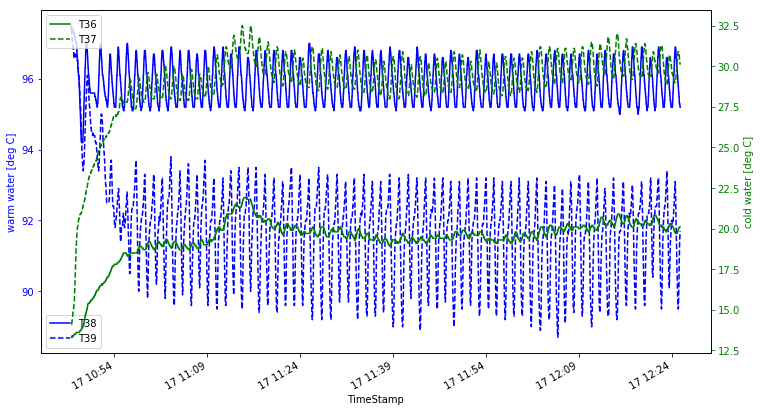

In [11]:
for name, s in df_seltime.items():
    fig, ax = plt.subplots(figsize=(12,7))
    df_seltime[name][stable_power[name]]['T38 [deg C]'].plot(ax=ax, color='b', label='T38')
    df_seltime[name][stable_power[name]]['T39 [deg C]'].plot(ax=ax, color='b', style='--', label='T39')
    ax.set_ylabel('warm water [deg C]', color='b')
    ax.tick_params('y', colors='b')
    ax.legend()

    ax2 = ax.twinx()
    df_seltime[name][stable_power[name]]['T36 [deg C]'].plot(ax=ax2, color='g', label='T36')
    df_seltime[name][stable_power[name]]['T37 [deg C]'].plot(ax=ax2, color='g', style='--', label='T37')
    ax2.set_ylabel('cold water [deg C]', color='g')
    ax2.legend()
    ax2.tick_params('y', colors='g')


## Plot booster valve correlation

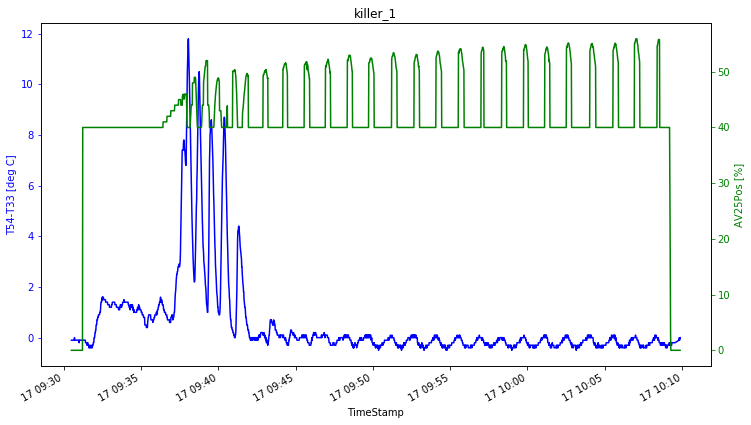

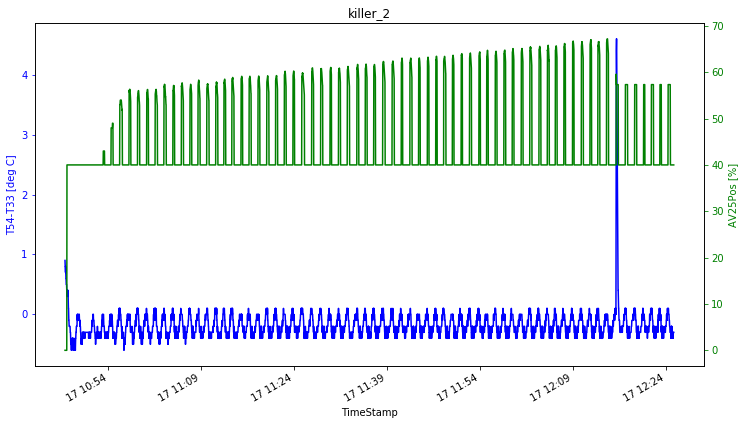

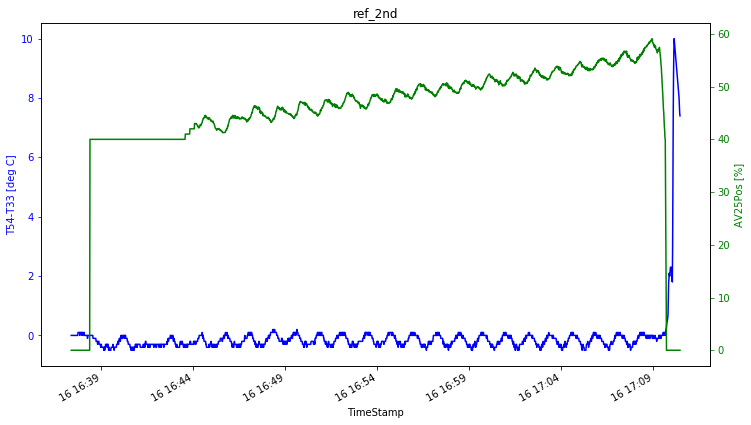

In [12]:
for name, s in wetgas_dT.items():
    fig, (ax, ax2) = plot_simple_two_scale_series(s, 
                                                  df_seltime[name][stable_power[name]]['AV25Pos [%]'], 
                                                  'T54-T33 [deg C]', 'AV25Pos [%]')
    ax2.set_title(name)
    #df_seltime[name][stable_power[name]]['T33 [deg C]'].plot(ax=ax2, color='g', style='--', label='T33')
    #ax2.set_ylabel('[deg C]', color='g')
    #ax2.legend(loc=2)


## Plot correlation between hot water and booster valve 

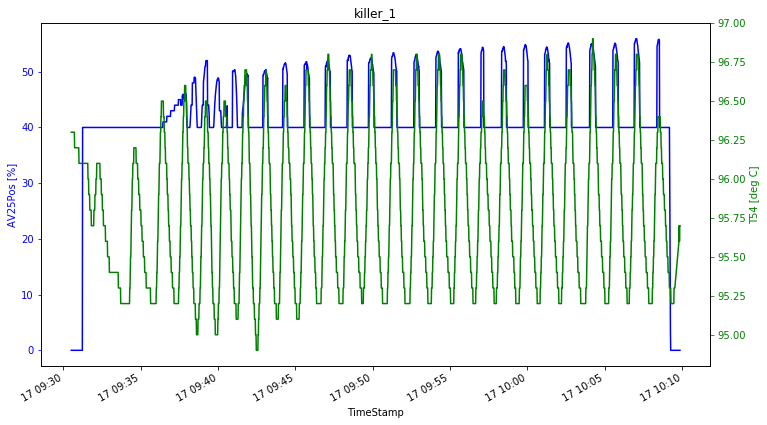

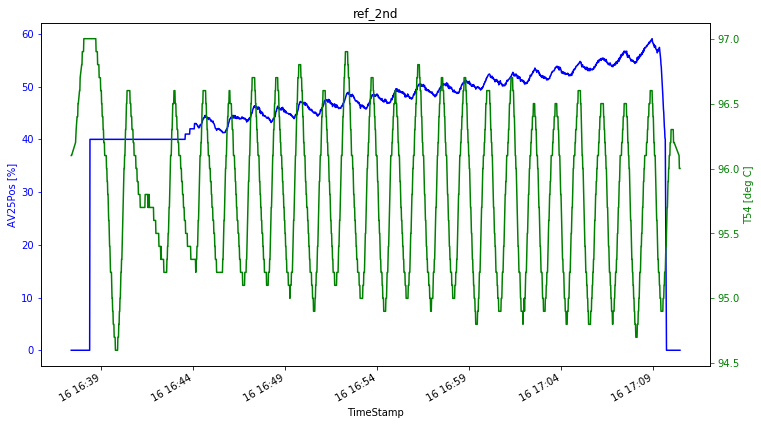

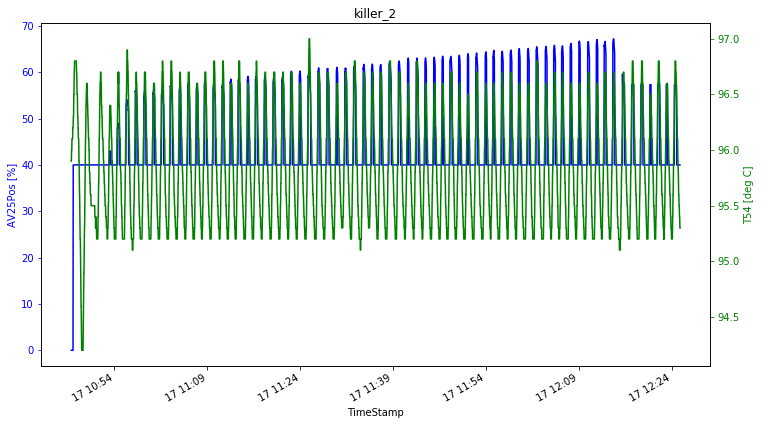

In [13]:
for name, df in df_seltime.items():
    fig, (ax, ax2) = plot_simple_two_scale_series(df[stable_power[name]]['AV25Pos [%]'], 
                                                  df[stable_power[name]]['T54 [deg C]'], 
                                                  'AV25Pos [%]', 'T54 [deg C]')
    ax2.set_title(name)

## Plot correlation between hot water and power 

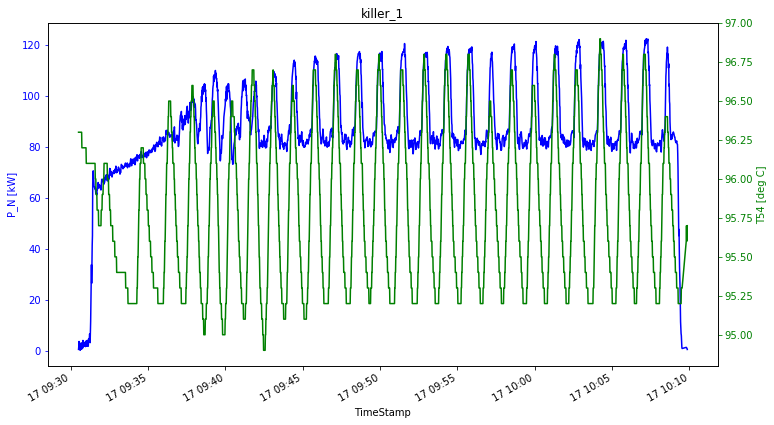

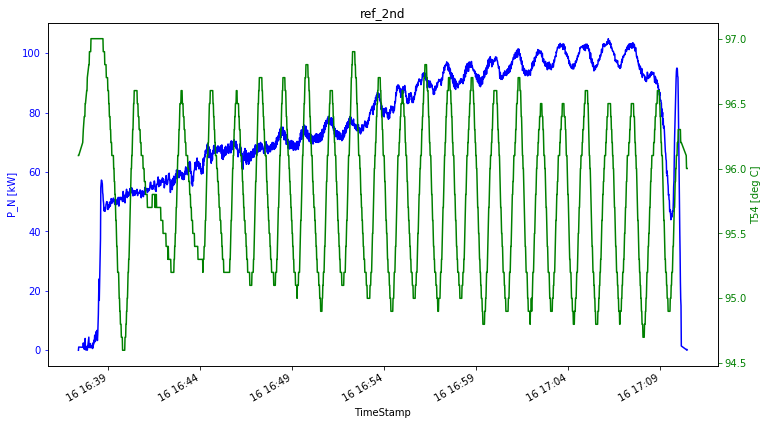

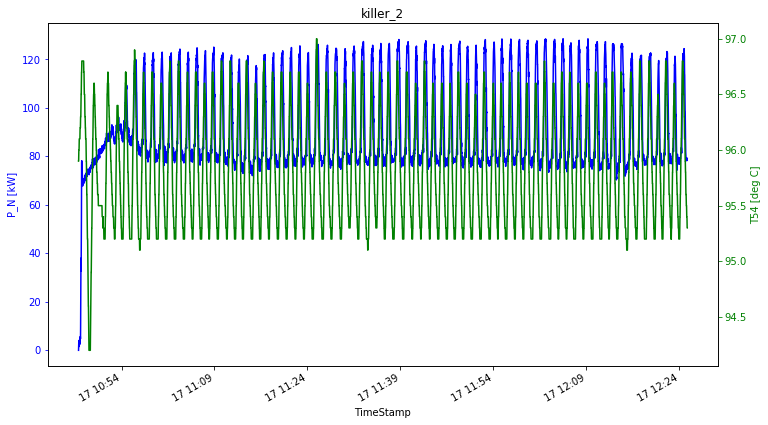

In [14]:
for name, df in df_seltime.items():
    fig, (ax, ax2) = plot_simple_two_scale_series(df[stable_power[name]]['P_N [kW]'], 
                                                  df[stable_power[name]]['T54 [deg C]'], 
                                                  'P_N [kW]', 'T54 [deg C]')
    ax2.set_title(name)
    #df_seltime[name][stable_power[name]]['T33 [deg C]'].plot(ax=ax2, color='g', style='--', label='T33')
    #ax2.set_ylabel('[deg C]', color='g')
    #ax2.legend(loc=2)
 

## Select wet gas events

Use time now, should probably try to use selection on variables 

In [15]:
wg_seltime = {"killer_wg1": logs["killer"].df.between_time("12:11", "12:20")}

Plot wet gas events

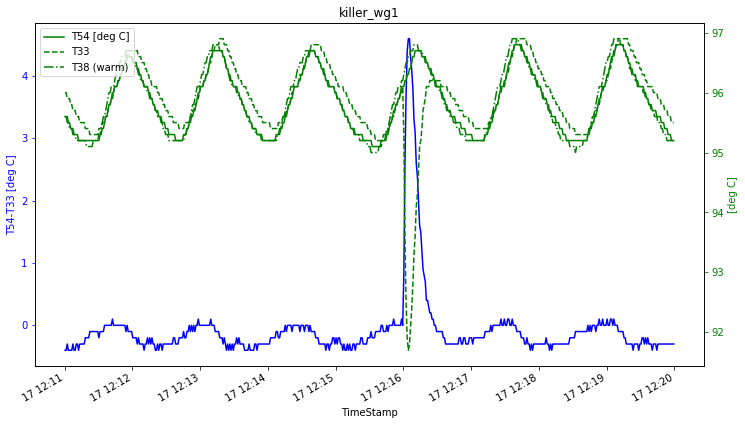

In [16]:
for name, df in wg_seltime.items():
    fig, (ax, ax2) = plot_simple_two_scale_series(df['T54 [deg C]'].sub(df['T33 [deg C]']), 
                                                  df['T54 [deg C]'], 
                                                  'T54-T33 [deg C]', 'T54 [deg C]')
    ax2.set_title(name)
    df['T33 [deg C]'].plot(ax=ax2, color='g', style='--', label='T33')
    df['T38 [deg C]'].plot(ax=ax2, color='g', style='-.', label='T38 (warm)')
    ax2.set_ylabel('[deg C]', color='g')
    ax2.legend(loc=2)
    



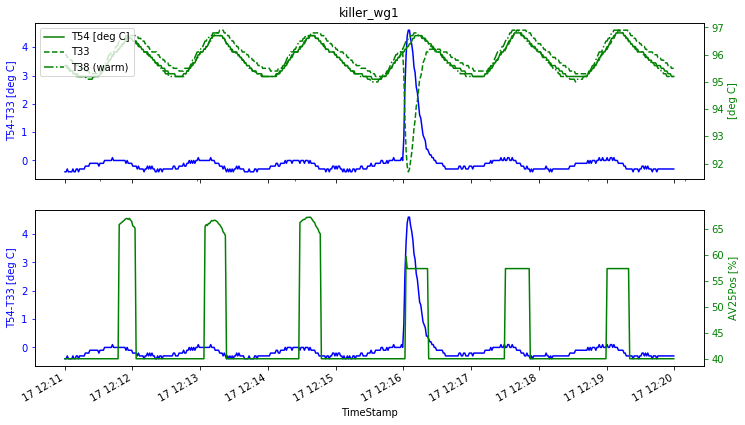

In [17]:
for name, df in wg_seltime.items():
    #fig, (ax1, ax3) = plot_simple_two_scale_series(df['T54 [deg C]'].sub(df['T33 [deg C]']), 
    #                                              df['AV25Pos [%]'], 
    #                                              'T54-T33 [deg C]', 'AV25Pos [%]')
    fig, (ax1, ax3) = plt.subplots(2,1, figsize=(12,7))
    y1 = df['T54 [deg C]'].sub(df['T33 [deg C]'])
    y2 = df['T54 [deg C]']
    l1 = 'T54-T33 [deg C]'
    l2 = 'T54 [deg C]'
    
    y1.plot(ax=ax1, color='b', label=l1)
    ax1.set_ylabel(l1, color='b')
    ax1.tick_params('y', colors='b')
    ax2 = ax1.twinx()
    y2.plot(ax=ax2, label=l2, color='g')
    df['T33 [deg C]'].plot(ax=ax2, color='g', style='--', label='T33')
    df['T38 [deg C]'].plot(ax=ax2, color='g', style='-.', label='T38 (warm)')
    ax2.set_ylabel('[deg C]', color='g')
    ax2.tick_params('y', colors='g')
    ax2.legend(loc=2)
    
    ax4 = ax3.twinx()
    y1.plot(ax=ax3, color='b', label=l1)
    ax3.set_ylabel(l1, color='b')
    ax3.tick_params('y', colors='b')
    df['AV25Pos [%]'].plot(ax=ax4, color='g')
    ax4.set_ylabel('AV25Pos [%]', color='g')
    ax4.tick_params('y', colors='g')
    #ax3.legend(loc=2)
    ax2.set_title(name)
    #df['T33 [deg C]'].plot(ax=ax2, color='g', style='--', label='T33')
    #ax2.set_ylabel('[deg C]', color='g')
    #ax2.legend(loc=2)